# [Taylor law](https://en.wikipedia.org/wiki/Taylor%27s_law)

In [1]:
import numpy as np
from scipy import stats
import os 
import pandas as pd
from plotnine import *

## Observations: Gene length distribution in different species

### Retrieve the statistical description and tax_id of species

##### Statistical description data file

In [2]:
# system
system = list(os.uname())[0]
if system == 'Linux':
    base_dir = "/media/emuro/Wes/"
elif system == 'Darwin':
    base_dir = "/Volumes/Wes/"
    
# statistics on length distribution for different species     
stat_file = base_dir + "results/geneLength/outputInputFiles/" + "analysis/some_statistics/stat_description/" 
#stat_file += "all__stat_description.ensembl.tsv"
stat_file += "all__stat_description.ensembl_v2.0__withLineage.tsv"
print(stat_file)

# retrieve data
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_7", "division_8", "species", "taxonomy_id", "Lineage", "Scientific_name", "count", "mean", "var"] + ["log10_mean", "log10_var"]]
#stat_df = stat_df[["division_8"]] 
# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/all__stat_description.ensembl_v2.0__withLineage.tsv


,division_7,division_8,species,taxonomy_id,Lineage,Scientific_name,count,mean,var,log10_mean,log10_var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,2161,Archaea; Euryarchaeota; Methanomada group; Met...,Methanobacterium bryantii,3168,840.404040,422343.848699,2.827684,0.082694
1,bacteria,archaea,methanobacterium_formicicum_gca_000762265,2162,Archaea; Euryarchaeota; Methanomada group; Met...,Methanobacterium formicicum,2352,862.427296,347239.612747,2.849723,0.076317


(33630, 11)


##### Filter some species

In [3]:
if 0:
    print(stat_df["division_8"].value_counts())
cond = stat_df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
stat_df = stat_df[cond]

stat_df = stat_df[stat_df["species"] != "mus_caroli"]

if 1:
    #display(stat_df.head(2))
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

(33460, 11)
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      222
metazoa          115
plants            96
Name: division_8, dtype: int64


## Observed Taylor law: Variance vs Length (genes)
$\sigma^{2}$ is the variance  
$\sigma^{2} = a . \mu^{\beta}$  
Because: 
- $\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

In [4]:
# FUNCTIONS
###########
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, bool_limits_breaks): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    print('v = {:4.4} * m^{:4.4};   R^2= {:2.4f}'.format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.4} '.format(10**intercept)  + '\t \mu^{' + '{:4.4}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.4f}$'.format(r_value**2)
    else:
        txt = ''
 

    # limits and tick-breaks
    if 1: # limits. 1:Manual set up
          #         0:Automatic set up
        if bool_limits_breaks: # cmp means
            pass
            #x_limits = [300, 90000]
            #y_limits = [100, 1100]
        else: # comp vars
            x_limits = [200, 35000]# [226.342425431711, 31542.1807707818]
            y_limits = [35000, 2500000000 ]# [38813.0212837739, 2322067489.28396]           
    else: # automatic
        x_limits=[min(df2plot[col_x].to_list())/2., 2.*max(df2plot[col_x].to_list())]
        y_limits=[min(df2plot[col_y].to_list())/2., 2.*max(df2plot[col_y].to_list())]
    if 1:
            print(x_limits, y_limits)
        
    if bool_limits_breaks: # mean
        pass
        #x_breaks = [500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000, 80000]
        #y_breaks = [100*x for x in range(1, 11)]
    else: # var
        x_breaks = [10**power for power in range(6)]
        y_breaks = [10**power for power in range(13)]
        if 1:
            print(x_breaks, y_breaks)

    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab)  # #A80000
        + scale_color_manual(values=['#D83B01', '#002050', '#000000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=x_breaks,
          limits = x_limits) 
        + scale_y_log10(breaks = y_breaks, 
          limits = y_limits)#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.8,0.3), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    return p

(33460, 11)
v = 0.01638 * m^2.508;   R^2= 0.9223
[200, 35000] [35000, 2500000000]
[1, 10, 100, 1000, 10000, 100000] [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000]


/home/emuro/python-my_venv/python3.8/my_env/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 143 rows containing missing values.
/home/emuro/python-my_venv/python3.8/my_env/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_smooth : Removed 1 rows containing missing values.
/home/emuro/python-my_venv/python3.8/my_env/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


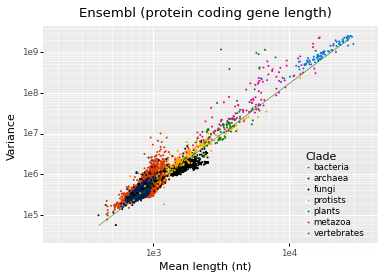

<ggplot: (8767467510013)>

In [5]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Ensembl (protein coding gene length)" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean length (nt)"   # "mean length (aa)"
y_lab = "Variance"
bool_show_regression = True
bool_limits_breaks = False

df2plot = stat_df.copy()

# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)
print(df2plot.shape)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, bool_limits_breaks)

## Llama la atención: Los puntos de plantas y metazoa que se alejan de la Taylor
It can be interactions plants-insects or with human-interaction. I see : trigo, piña, cacao, cebada, mosca de fruta, abejas.  
**Need more testing**

In [6]:
if 0:
    df2plot = stat_df.copy()
    df2plot = df2plot[(df2plot["mean"]>2000) & (df2plot["mean"]<9000)]
    df2plot = df2plot[(df2plot["var"]>3.75*10**8) & (df2plot["var"]<10**10)]
    display(df2plot)


    # Sort division_8 in order to plot the clades in an order (everything can be displayed)
    if 0:
        print(df2plot.division_8.unique())
    df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                    categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                    ordered=True)
    df2plot.sort_values('division_8', inplace=True)

    plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression,bool_limits_breaks)

In [7]:
df2plot = stat_df.copy()
df2plot = df2plot[(df2plot["species"].str.contains("bombus_"))]
display(df2plot)


# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

# plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

,division_7,division_8,species,taxonomy_id,Lineage,Scientific_name,count,mean,var,log10_mean,log10_var
32845,metazoa,metazoa,bombus_terrestris,30195,Eukaryota; Metazoa; Ecdysozoa; Arthropoda; Hex...,Bombus terrestris,10581,16661.281448,2.204330e+09,3.713088,0.311522
32882,metazoa,metazoa,bombus_impatiens,132113,Eukaryota; Metazoa; Ecdysozoa; Arthropoda; Hex...,Bombus impatiens,15896,7095.112229,4.567260e+08,3.350071,0.334799


### Analyzing clade by clade:

In [8]:
for clado in stat_df["division_8"].unique().tolist(): # for each division
    df2plot = stat_df[stat_df["division_8"]==clado]
    if 0: # Set up to 1 for plotting by division 
        plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, False, False) # False -> bool_show_regression = False
                                                                              # False -> bool_limits_breaks

## Y si analizo por separado las lineas evolutivas?:
- 'bacteria' < 'archaea' < 'fungi' < 'protists' < 'metazoa' < 'vertebrates'  
- 'bacteria' < 'archaea' < 'protists' < 'plants'  
Observo que se mantienen muy bien frente a la que tiene todas las especies. 

['bacteria' 'plants' 'protists']
v = 0.01992 * m^2.48;   R^2= 0.6438
[200, 35000] [35000, 2500000000]
[1, 10, 100, 1000, 10000, 100000] [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000]


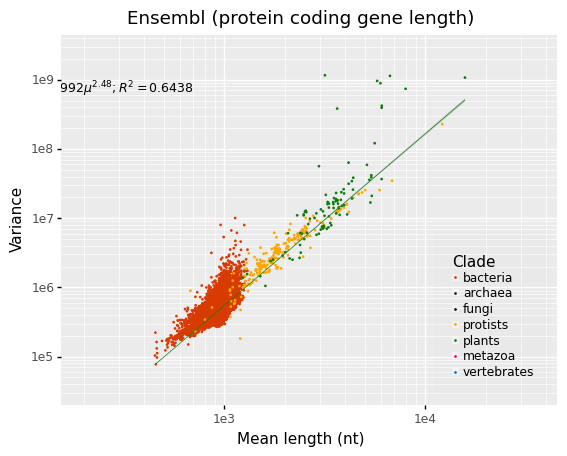

In [9]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Ensembl (protein coding gene length)" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean length (nt)"   # "mean length (aa)"
y_lab = "Variance"
bool_show_regression = True
bool_limits_breaks   = False

df2plot = stat_df.copy()

if 1: # todos
    pass
elif 0:  # 'bacteria' < 'archaea' < 'protists' < 'metazoa' < 'vertebrates'
    df2plot = df2plot[ (df2plot["division_8"] != "plants") & (df2plot["division_8"] != "fungi")  ] 
elif 0: # 'bacteria' < 'archaea' < 'fungi' < 'protists' < 'metazoa' < 'vertebrates'
    df2plot = df2plot[ (df2plot["division_8"] != "plants")  ] 
elif 0: # 'bacteria' < 'archaea' < 'protists' < 'plants' 
    df2plot = df2plot[ ~df2plot["division_8"].isin(["fungi", "metazoa", "vertebrates"])]  

    
# Otros filtros de las lineas evolutivas en detalle
# el anterior filtro ha de estar con todos:
#
# bacteria, protists, fungi
###########################
if 1: # lo anterior (todos)
    pass
elif 0: # solo bacteria, protist, fungi
    df2plot = df2plot[ df2plot["division_8"].isin(["protists", "bacteria", "fungi"])]
elif 0: # solo bacteria y protist
    df2plot = df2plot[ df2plot["division_8"].isin(["protists", "bacteria"])]
elif 0: # solo bacteria y fungi
    df2plot = df2plot[ df2plot["division_8"].isin(["fungi", "bacteria"])]   # No hay continuidad!
elif 0: # solo protista y fungi
    df2plot = df2plot[ df2plot["division_8"].isin(["fungi", "protists"])]   # No hay continuidad!
    
# Otros filtros de las lineas evolutivas en detalle
# el anterior filtro ha de estar con todos:
#
# bacteria, protists, plants
############################
if 0: # lo anterior (todos)
    pass
elif 1: # solo bacteria, protist, plants
    df2plot = df2plot[ df2plot["division_8"].isin(["plants", "protists", "bacteria"])]
elif 0: # solo 
    df2plot = df2plot[ df2plot["division_8"].isin(["plants", "protists"])]   # hay continuidad!
elif 0: # solo bacteria y protist
    df2plot = df2plot[ df2plot["division_8"].isin(["protists", "bacteria"])]

    
# Otros filtros de las lineas evolutivas en detalle
# el anterior filtro ha de estar con todos:
#
# bacteria, protists, metazoa, vertebrates
##########################################
if 1: # lo anterior (todos)
    pass
elif 0: # solo bacteria, protist, metazoa, vertebrates
    df2plot = df2plot[ df2plot["division_8"].isin(["vertebrates", "metazoa", "protists", "bacteria"])]
elif 0: # solo vertebrates, metazoa
    df2plot = df2plot[ df2plot["division_8"].isin(["vertebrates", "metazoa"])]
elif 0: # solo metazoa, protist
    df2plot = df2plot[ df2plot["division_8"].isin(["metazoa", "protists"])]  
elif 0: # solo protist, bacteria
    df2plot = df2plot[ df2plot["division_8"].isin(["protists", "bacteria"])]  
    
    
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 1:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

p = plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, bool_limits_breaks)
if 1:
    print(p)

## Algae: Are they plants? protists?

In [10]:
if 0:
    algae_df = df2plot[ df2plot.species.str.contains("lgae")  ] # 5 bacterias
elif 1:
    algae_df = df2plot[ (df2plot.division_8.isin(["plants"])) & (df2plot["mean"] < 2000)] 
    #algae_df = df2plot[ (df2plot.division_8.isin(["plants"])) & (df2plot["mean"] > 2000) & (df2plot["mean"] < 2500)] # genial ni un alga!
elif 0:
    algae_df = df2plot[ (df2plot.division_8.isin(["protists"])) & (df2plot["mean"] < 1700)]      
    algae_df = df2plot[ (df2plot["mean"] > 1400) ]
elif 0:
    algae_df = df2plot[ (df2plot.division_8.isin(["protists"])) ]      
    algae_df = df2plot[ df2plot["Lineage"].str.contains("flagel") ]
    
algae_df = algae_df.sort_values(by="mean")

display(algae_df)
print(algae_df.shape)
print("tax_id", algae_df.taxonomy_id.to_list()) 

,division_7,division_8,species,taxonomy_id,Lineage,Scientific_name,count,mean,var,log10_mean,log10_var
32905,plants,plants,chondrus_crispus,2769,Eukaryota; Rhodophyta; Florideophyceae; Rhodym...,Chondrus crispus,9807,1237.444580,1.375793e+06,2.909912,0.183225
32998,plants,plants,ostreococcus_lucimarinus,436017,Eukaryota; Viridiplantae; Chlorophyta; Mamiell...,Ostreococcus lucimarinus (strain CCE9901),7603,1301.220571,1.559273e+06,3.005187,0.093030
32997,plants,plants,cyanidioschyzon_merolae,280699,Eukaryota; Rhodophyta; Bangiophyceae; Cyanidia...,Cyanidioschyzon merolae (strain 10D),4973,1511.302031,1.453511e+06,3.076062,0.093180
32990,plants,plants,galdieria_sulphuraria,130081,Eukaryota; Rhodophyta; Bangiophyceae; Cyanidia...,Galdieria sulphuraria,6622,1604.177288,1.053213e+06,3.138280,0.056639
32983,plants,plants,selaginella_moellendorffii,88036,Eukaryota; Viridiplantae; Streptophyta; Embryo...,Selaginella moellendorffii,34799,1700.960315,2.408066e+06,3.119836,0.098352
32986,plants,plants,brassica_oleracea,109376,Eukaryota; Viridiplantae; Streptophyta; Embryo...,Brassica oleracea var. oleracea,59220,1748.696437,2.524853e+06,3.093886,0.139627
32918,plants,plants,brassica_napus,3708,Eukaryota; Viridiplantae; Streptophyta; Embryo...,Brassica napus,101040,1952.134610,2.884792e+06,3.139611,0.153245


(7, 11)
tax_id [2769, 436017, 280699, 130081, 88036, 109376, 3708]


v = 17.34 * m^1.569;   R^2= 0.4628
[200, 35000] [35000, 2500000000]
[1, 10, 100, 1000, 10000, 100000] [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000]


/home/emuro/python-my_venv/python3.8/my_env/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


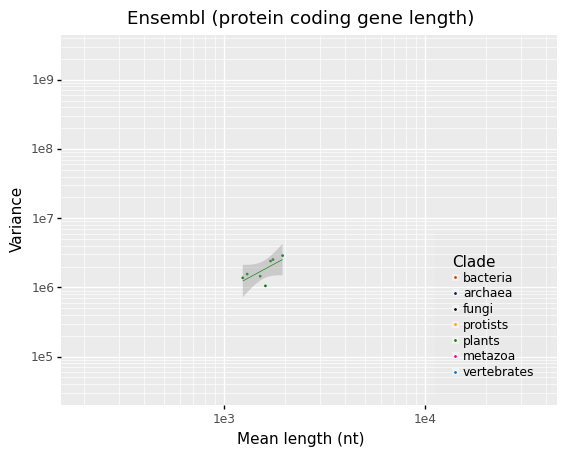

<ggplot: (8767467593837)>

In [11]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Ensembl (protein coding gene length)" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean length (nt)"   # "mean length (aa)"
y_lab = "Variance"
bool_show_regression = False
bool_limits_breaks = False

df2plot = algae_df.copy()

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression, bool_limits_breaks)